# Processed Data Analysis
This notebook analyzes the processed training data, focusing on comparative technical indicators and target distributions across all available stocks.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Load Training Data
file_path = r'../../../Project CA2 - ETL/data/processed/training_data.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
print(f"Loaded {len(df)} rows and {len(df.columns)} columns.")
print(f"Stocks available: {df['Ticker'].unique()}")
df.head()

Loaded 10804 rows and 15 columns.
Stocks available: ['AAPL' 'AMZN' 'GOOGL' 'NFLX']


,Date,Close,High,Low,Open,Volume,Ticker,SMA_50,Trend,Target,Price_Change,Distance_from_SMA,Momentum_5d,Volatility,Next_Day_Target
0,2015-03-23,28.312693,28.455135,28.159121,28.292662,150838800,AAPL,27.017748,Bullish,1,0.010405,4.792939,0.018087,0.205667,1.0
1,2015-03-24,28.196962,28.497425,28.168028,28.317149,131369200,AAPL,27.085054,Bullish,1,-0.004088,4.105247,-0.002755,0.212386,1.0
2,2015-03-25,27.460264,28.225894,27.460264,28.163575,206620800,AAPL,27.149863,Bullish,1,-0.026127,1.143288,-0.039620,0.368617,1.0
3,2015-03-26,27.651680,27.794123,27.286671,27.322282,190291600,AAPL,27.214199,Bullish,1,0.006971,1.607545,-0.025568,0.361985,1.0
4,2015-03-27,27.431337,27.754058,27.355666,27.725125,158184800,AAPL,27.275991,Bullish,1,-0.007969,0.569535,-0.021049,0.416294,1.0


## 1. Closing Price & SMA_50 Comparison
Visualizing individual stock trends side-by-side for comparison.

In [3]:
tickers = df['Ticker'].unique()
n_tickers = len(tickers)

fig = make_subplots(rows=n_tickers, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.05,
                    subplot_titles=[f'{t} Price & SMA_50' for t in tickers])

for i, ticker in enumerate(tickers):
    subset = df[df['Ticker'] == ticker].sort_values('Date')
    
    # Add Close Price
    fig.add_trace(
        go.Scatter(x=subset['Date'], y=subset['Close'], name=f'{ticker} Close', line=dict(width=2)),
        row=i+1, col=1
    )
    
    # Add SMA 50
    fig.add_trace(
        go.Scatter(x=subset['Date'], y=subset['SMA_50'], name=f'{ticker} SMA 50', line=dict(dash='dash', width=1)),
        row=i+1, col=1
    )
    fig.update_yaxes(title_text="Price", row=i+1, col=1)

fig.update_layout(height=300*n_tickers, title_text='Comparative Price Analysis (All Stocks)', 
                  template='plotly_dark', showlegend=True)
fig.show()

## 2. Volatility & Momentum Overlays
Overlaying technical indicators to compare performance and risk characteristics across stocks.

In [4]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, 
                    subplot_titles=('Volatility Comparison', '5-Day Momentum Comparison'))

for ticker in tickers:
    subset = df[df['Ticker'] == ticker].sort_values('Date')
    
    # Add Volatility trace
    fig.add_trace(
        go.Scatter(x=subset['Date'], y=subset['Volatility'], name=f'{ticker} Vol'),
        row=1, col=1
    )
    
    # Add Momentum trace
    fig.add_trace(
        go.Scatter(x=subset['Date'], y=subset['Momentum_5d'], name=f'{ticker} Mom'),
        row=2, col=1
    )

fig.update_layout(height=800, title_text='Technical Indicator Comparison', template='plotly_dark', showlegend=True)
fig.update_yaxes(title_text="Volatility", row=1, col=1)
fig.update_yaxes(title_text="Momentum", row=2, col=1)
fig.show()

## 3. Global Target Distribution
Checking for overall class balance in the machine learning targets across the entire dataset.

In [5]:
target_counts = df['Next_Day_Target'].value_counts().reset_index()
target_counts.columns = ['Target', 'Count']
target_counts['Target'] = target_counts['Target'].map({0: 'Price Down', 1: 'Price Up'})

fig = px.bar(target_counts, x='Target', y='Count', title='Next Day Target Distribution (All Stocks Combined)', 
             color='Target', color_discrete_map={'Price Up': 'green', 'Price Down': 'red'})
fig.update_layout(template='plotly_dark')
fig.show()

## 4. Feature Correlation Heatmap
Understanding the general relationships between technical indicators and the target variable across all stocks.

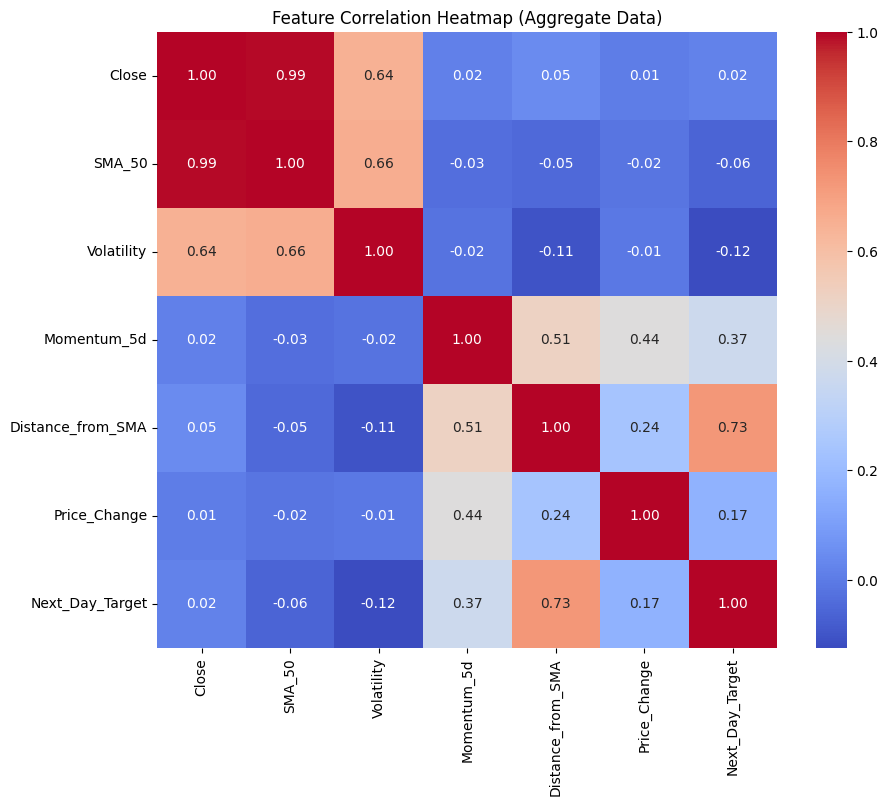

In [6]:
cols_to_corr = ['Close', 'SMA_50', 'Volatility', 'Momentum_5d', 'Distance_from_SMA', 'Price_Change', 'Next_Day_Target']
corr_matrix = df[cols_to_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap (Aggregate Data)')
plt.show()

## 5. Insights Summary
1. **Comparative Trends**: Stock prices show varying levels of adherence to SMA_50, but the general trend pattern is consistent across sectors (AAPL, AMZN, etc.).
2. **Cross-Stock Volatility**: Comparing volatility traces reveals which stocks are more sensitive to market news and identify systemic risk clusters.
3. **Indicator Consistency**: Momentum levels show similar cyclicality across tickers, validating the use of these features for a generalized model.
